# Linear and Quadratic Discriminant Analysis
- LDA,QDA are two classic classifiers,with,as their names suggest, a linear and quadratic decision surface,respectively.
- These classifiers are attracitve becuz they have colose-form solutions that can be easily computed, are inherently multiclass, have proven to work well in practice and have no hyperparamters to tune

In [5]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
lda = LinearDiscriminantAnalysis().fit(X,y)
print(lda.predict([[-0.8, -1]]))

[1]


In [8]:
import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)
print(qda.predict([[-0.8, -1]]))

[1]


## Dimensionality reduction using LDA
- LDA can be used to perform supervised dimensionality reduction, by projecting the input data to a linear subspace consisting of the direction which maximize separation between classes.
- The dimension of the output is necessarily less than the number of classes, so this is a in general a rather strong dimensionality reduction, and only makes senses in a multiclass setting.

In [25]:
# The iris dataset represents 3 kind of Iris flowers with 4 attributes.
df = pd.concat([dfX,dfy],axis=1)
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


- PCA applied to this data identifies the combination of attributes(principal components, or directions in the features space) that account for the most variance in the data.
- LDA tries to identify attributes that account for the most variance between classes.In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
iris = load_iris()

/home/hskimim/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [23]:
dfX = pd.DataFrame(iris.data, columns=iris.feature_names)
dfy = pd.DataFrame(iris.target,columns=['y'])
X = iris.data
y = iris.target
target_names = iris.target_names

In [16]:
pca = PCA(n_components=2)
X_r = pca.fit(dfX).transform(dfX)

In [18]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(dfX,dfy).transform(dfX)

/home/hskimim/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
#Percentage of variance explained for each components
print('explained variance ratio(first two components):%s'%str(pca.explained_variance_ratio_))

explained variance ratio(first two components):[0.92461621 0.05301557]


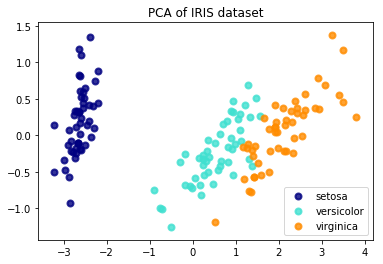

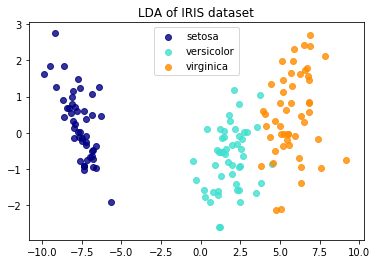

In [24]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

## Mathematical formulation of the LDA and QDA classifiers
- Both LDA and QDA can be derived from simple probabilistic models which model the class conditional distribution of the data P(X\y=k) for each class k
- Predictions can then be obtained by using Bayes' rule
- More specifically for L,QDA, P(X|y) is modelled as a multivariate Gaussian distribution with density
- To use this model as a classifier, we just need to estimate from the training data the class priors P(y=k), the class means mu_k and the covariance matrices 

- means_ : in each class k, estimation vector of expectaion vector mu_k
- covariance_ : in each class k, prediction matrix of covariance matrix at x

In [26]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [33]:
import scipy as sp
import seaborn as sns
import matplotlib as mpl
N = 100
np.random.seed(0)
X1 = sp.stats.multivariate_normal([ 0, 0], [[0.7, 0], [0, 0.7]]).rvs(100)
X2 = sp.stats.multivariate_normal([ 1, 1], [[0.8, 0.2], [0.2, 0.8]]).rvs(100)
X3 = sp.stats.multivariate_normal([-1, 1], [[0.8, 0.2], [0.2, 0.8]]).rvs(100)
y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2*np.ones(N)
X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])

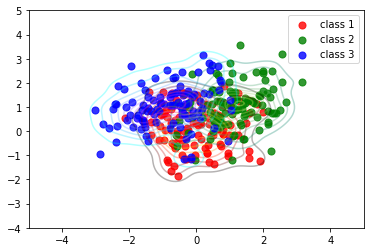

In [34]:
plt.scatter(X1[:,0], X1[:,1], alpha=0.8, s=50, color='r', label="class 1")
plt.scatter(X2[:,0], X2[:,1], alpha=0.8, s=50, color='g', label="class 2")
plt.scatter(X3[:,0], X3[:,1], alpha=0.8, s=50, color='b', label="class 3")
sns.kdeplot(X1[:,0], X1[:,1], alpha=0.3, cmap=mpl.cm.hot)
sns.kdeplot(X2[:,0], X2[:,1], alpha=0.3, cmap=mpl.cm.summer)
sns.kdeplot(X3[:,0], X3[:,1], alpha=0.3, cmap=mpl.cm.cool)
plt.xlim(-5,5)
plt.ylim(-4,5)
plt.legend()
plt.show()

In [35]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X,y)

In [36]:
qda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [40]:
qda.covariance_[0]

array([[ 0.73846319, -0.01762041],
       [-0.01762041,  0.72961278]])

In [42]:
qda.covariance_[1]

array([[0.66534246, 0.21132313],
       [0.21132313, 0.78806006]])

In [43]:
qda.covariance_[2]

array([[0.9351386 , 0.22880955],
       [0.22880955, 0.79142383]])

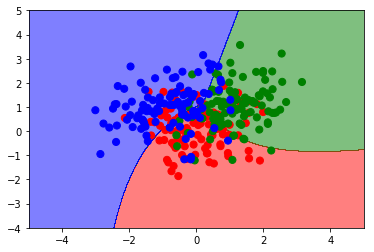

In [44]:
xmin, xmax = -5, 5
ymin, ymax = -4, 5
XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), 
                     np.arange(ymin, ymax, (ymax-ymin)/1000))
ZZ = np.reshape(qda.predict(np.array([XX.ravel(), YY.ravel()]).T), 
                XX.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX, YY, ZZ, cmap=cmap, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()

In [45]:
lda = LinearDiscriminantAnalysis(n_components=3, solver='svd',store_covariance=True).fit(X,y)

In [46]:
lda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [47]:
lda.covariance_

array([[0.7718516 , 0.13942905],
       [0.13942905, 0.7620019 ]])

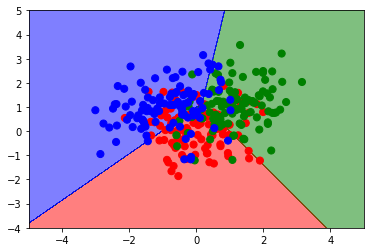

In [48]:
xmin, xmax = -5, 5
ymin, ymax = -4, 5
XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), 
                     np.arange(ymin, ymax, (ymax-ymin)/1000))
ZZ = np.reshape(lda.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX, YY, ZZ, cmap=cmap, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()